In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from scipy.stats import zscore
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# set color catgory
cat = 'color'

In [3]:
# load C data and X data
cdf = pd.read_csv('C_Mod.csv')
xdf = pd.read_csv('X_Mod.csv')

In [4]:
# Drop rows with NaN values
xdrops = xdf[xdf.isna().any(axis=1)].index.tolist()
cdrops = cdf[cdf.isna().any(axis=1)].index.tolist()
nans = xdrops + cdrops
print("NaN rows dropped:", nans)

NaN rows dropped: [26, 36, 23]


In [5]:
# Re-assign cdf and xdf
cdf = cdf.drop(nans)
xdf = xdf.drop(nans)

In [6]:
# Cell 4: Prepare data for PLS regression
# Get colors and IDs
levs = xdf['color'].tolist()
myid = xdf['Sample'].tolist()  # for labeling by index if needed



In [7]:
# Drop unwanted columns
columns_to_drop = ['Sample', 'color']
y = cdf.drop(columns=columns_to_drop, axis=1)
X = xdf.drop(columns=columns_to_drop, axis=1)

In [8]:
# Get column names
cnames = y.columns.tolist()
xnames = X.columns.tolist()

In [9]:
# Simple PLS regression with 5 comps, let's see 
pls = PLSRegression(n_components=5, scale=True)
pls.fit(X, y)

PLSRegression(n_components=5)

In [10]:
# Extract loadings and scores
t_pls = pls.x_scores_
w_pls = pls.x_weights_
q_pls = pls.y_loadings_

In [11]:
# Cell 7: Plotting the PLS Biplot
colordic = {'red': 'red', 'rose': 'pink', 'white': 'yellow'}
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [12]:
# Scaling factors for biplot
wscale = 100
qscale = 100
sscale = 1

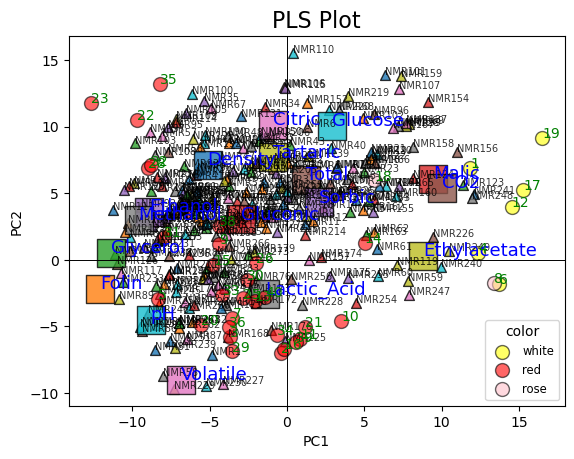

In [13]:
# Plot the w loadings (explanatory variables)
for i in range(len(w_pls)):
    plt.scatter(w_pls[i][0] * wscale, w_pls[i][1] * wscale, s=50, alpha=0.8, marker='^', edgecolor='black')
    plt.text(w_pls[i][0] * wscale, w_pls[i][1] * wscale, xnames[i], fontsize=7, color='black', alpha=0.8)

# Plot the q loadings (response variables)
for i in range(len(q_pls)):
    plt.scatter(q_pls[i][0] * qscale, q_pls[i][1] * qscale, s=400, alpha=0.8, marker='s', edgecolor='black')
    plt.text(q_pls[i][0] * qscale, q_pls[i][1] * qscale, cnames[i], fontsize=13, color='blue')

# Plot the samples (T)
used = []
scores = t_pls
for i in range(len(scores)):
    plt.text(scores[i][0] * sscale, scores[i][1] * sscale, myid[i], fontsize=10, color='green')
    if levs[i] in used:
        plt.scatter(scores[i][0] * sscale, scores[i][1] * sscale, s=100, alpha=0.6, color=colordic[levs[i]], edgecolor='black')
    else:
        plt.scatter(scores[i][0] * sscale, scores[i][1] * sscale, s=100, label=levs[i], color=colordic[levs[i]], alpha=0.6, edgecolor='black')
        used.append(levs[i])

# Add axis lines
plt.axhline(0, color='k', linestyle='-', linewidth=0.7)
plt.axvline(0, color='k', linestyle='-', linewidth=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')

# Add legend
plt.legend(title=cat, loc=4, fontsize='small')
plt.title('PLS Plot', fontsize=16)

plt.show()

## Effect plots

Consider about feature: Volatile, seems like NMR58, NMR229, NMR227, NMR230 are postively associated, and NMR101 NMR159, NMR107, NMR219 are negatively associated.

In [14]:
# extract above NRM columns from X and Volatile from y to form a new df 
X_vol = pd.DataFrame(X[['NMR58', 'NMR229', 'NMR227', 'NMR230', 'NMR101', 'NMR159', 'NMR107', 'NMR219']])
y_vol = pd.DataFrame(y['Volatile'])

df_Volalite = pd.concat([X_vol, y_vol], axis=1)
df_Volalite

,NMR58,NMR229,NMR227,NMR230,NMR101,NMR159,NMR107,NMR219,Volatile
0,-4.606153e+06,-1.312666e+06,4937.012084,-1.004304e+06,1.412880e+06,84647.943150,1.654328e+06,48733.687660,0.201970
1,2.340618e+07,-6.568638e+05,10285.583510,-8.742012e+05,-3.296213e+05,-29967.929870,-3.837419e+05,-13511.391710,0.467540
2,1.466904e+07,2.105993e+06,-81122.670460,1.616862e+06,7.519141e+04,-31727.929870,-1.350359e+05,-13866.947260,0.486140
3,-2.710369e+07,-1.450554e+06,21716.837700,-1.242256e+06,-2.550473e+05,24661.643130,-2.474823e+05,-2996.712520,0.227750
4,-2.974099e+06,2.119890e+06,-59888.796100,2.782768e+06,-2.086991e+05,-87673.004760,-9.729640e+04,2912.019875,0.538590
5,-2.870519e+07,-1.540292e+06,-4223.443986,-1.087461e+06,-4.472434e+05,125547.276900,-4.697178e+05,-3530.797027,0.380620
6,8.617471e+06,-6.204223e+04,-6875.051408,3.375465e+06,-3.299159e+05,-76228.247330,-3.292606e+05,-6631.391706,0.555920
7,-3.275667e+07,-1.496242e+06,-198717.591100,-1.260040e+06,-3.427972e+05,26275.879660,-3.092378e+05,-13724.725040,0.186750
8,5.159046e+06,-4.212524e+05,83750.980340,-7.230317e+05,-2.729965e+05,13912.705050,-2.614816e+05,1599.719405,0.310760
9,-7.518439e+06,1.396082e+06,42133.739110,2.078761e+05,-3.221459e+05,-40291.596310,-2.629527e+05,-17903.754770,0.410860


In [15]:
import statsmodels.formula.api as smf

In [25]:
def test_linear_regression_combinations(X, y):
  results_table = pd.DataFrame(index=X.columns, columns=y.columns)

  # loop over each column in y and X
  for y_col in y.columns:
    for x_col in X.columns:
      df_combined = pd.DataFrame({y_col: y[y_col], x_col: X[x_col]})

      formula = f'{y_col} ~ {x_col}'

      lin_reg = smf.ols(formula, data=df_combined).fit()
      # err_series = lin_reg.params - lin_reg.conf_int()[0]
      # coef_df = pd.DataFrame({'coef': lin_reg.params.values[:],
      #                         'err': err_series.values[:],
      #                         'varname': err_series.index.values[:]})
      # results_list.append((y_col, x_col, coef_df))
      coef = lin_reg.params[x_col]
      results_table.at[x_col, y_col] = coef

  return results_table
results_table = test_linear_regression_combinations(X, y)

In [33]:
# Function to convert numbers in the DataFrame to 1, -1, or 0 based on sign
def convert_sign_to_indicator(results_table):
    # Define a lambda function to check the sign of each element
    sign_converter = lambda x: 1 if x > 0 else (-1 if x < 0 else 0)
    
    # Apply this function to the entire DataFrame using applymap
    converted_table = results_table.map(sign_converter)
    
    return converted_table
converted_table = convert_sign_to_indicator(results_table)

# save as a excel file

converted_table.to_excel('effect_table.xlsx', index=True)



In [17]:
formula = 'Volatile ~ NMR58 + NMR229 + NMR227	+ NMR230	+ NMR101 + NMR159 + NMR107	+ NMR219'
lin_reg = smf.ols(formula, data=df_Volalite).fit()
err_series = lin_reg.params - lin_reg.conf_int()[0]
coef_df = pd.DataFrame({'coef': lin_reg.params.values[:],
                        'err': err_series.values[:],
                        'varname': err_series.index.values[:]})
coef_df

,coef,err,varname
0,3.796054e-01,3.798468e-02,Intercept
1,2.194383e-09,3.592336e-09,NMR58
2,3.687485e-08,5.360970e-08,NMR229
3,3.044736e-08,5.229931e-07,NMR227
4,-3.958864e-09,3.930598e-08,NMR230
5,-9.230008e-09,2.384356e-07,NMR101
6,-1.749897e-07,6.513973e-07,NMR159
7,-3.930166e-08,2.221043e-07,NMR107
8,-6.728780e-07,3.090715e-06,NMR219


In [18]:
# drop the intercept row
coef_df = coef_df.drop(coef_df.index[0])
coef_df

,coef,err,varname
1,2.194383e-09,3.592336e-09,NMR58
2,3.687485e-08,5.360970e-08,NMR229
3,3.044736e-08,5.229931e-07,NMR227
4,-3.958864e-09,3.930598e-08,NMR230
5,-9.230008e-09,2.384356e-07,NMR101
6,-1.749897e-07,6.513973e-07,NMR159
7,-3.930166e-08,2.221043e-07,NMR107
8,-6.728780e-07,3.090715e-06,NMR219


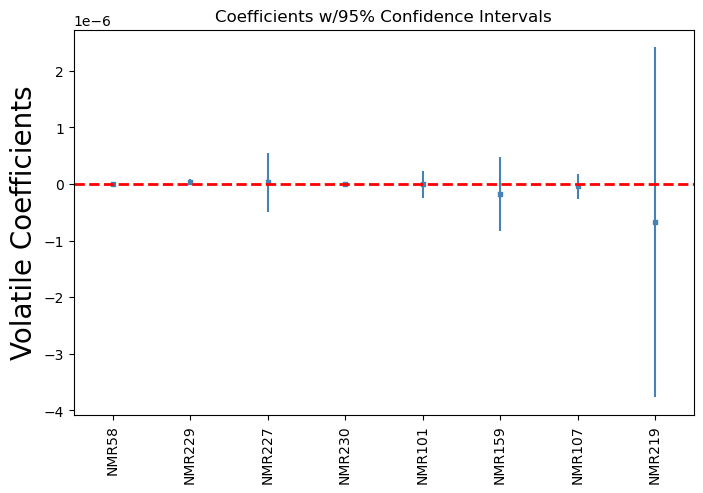

In [19]:
#plot coeff
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
              ax=ax, color='none', ecolor='steelblue',
              yerr='err', legend=False)
ax.set_ylabel('Volatile Coefficients',fontsize=20)
ax.set_xlabel('')
ax.set_title('Coefficients w/95% Confidence Intervals')
ax.scatter(x=np.arange(coef_df.shape[0]), 
            marker='s', s=10, 
            y=coef_df['coef'], color='steelblue')
ax.axhline(y=0, linestyle='--', color='red', linewidth=2)

## How to optimize the number of components

d:\Software\Anaconda\envs\WinConda\Lib\site-packages\sklearn\cross_decomposition\_pls.py:345: UserWarning: y residual is constant at iteration 35
  warnings.warn(f"y residual is constant at iteration {k}")
d:\Software\Anaconda\envs\WinConda\Lib\site-packages\sklearn\cross_decomposition\_pls.py:345: UserWarning: y residual is constant at iteration 35
  warnings.warn(f"y residual is constant at iteration {k}")
d:\Software\Anaconda\envs\WinConda\Lib\site-packages\sklearn\cross_decomposition\_pls.py:345: UserWarning: y residual is constant at iteration 35
  warnings.warn(f"y residual is constant at iteration {k}")
d:\Software\Anaconda\envs\WinConda\Lib\site-packages\sklearn\cross_decomposition\_pls.py:345: UserWarning: y residual is constant at iteration 35
  warnings.warn(f"y residual is constant at iteration {k}")


Suggested number of components:  15


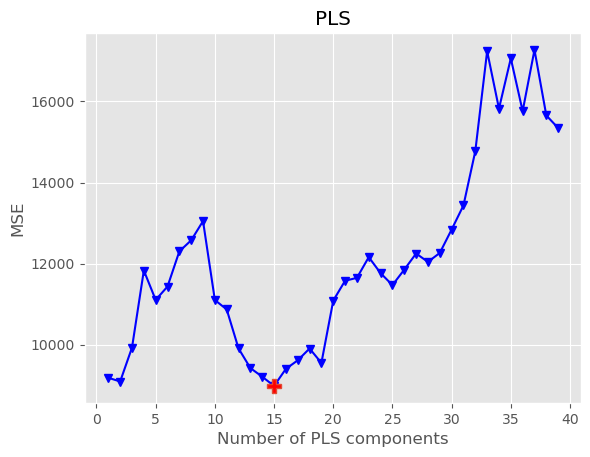

R2 calib: 0.917
R2 CV: 0.278
MSE calib: 1312.530
MSE CV: 8978.752


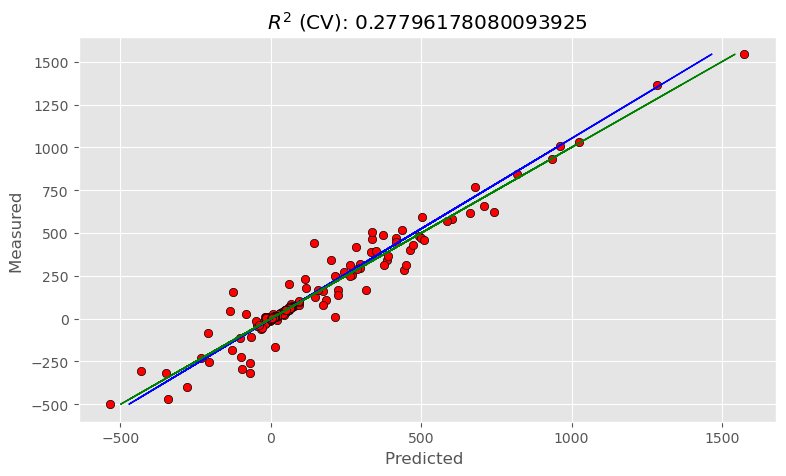

PLSRegression(n_components=15)

In [20]:
# Function to optimize PLS components via cross-validation
def optimise_pls_cv(X, y, n_comp, plot_components=True):
    mse = []
    component = np.arange(1, n_comp)

    for i in component:
        pls = PLSRegression(n_components=i)
        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)
        mse.append(mean_squared_error(y, y_cv))

    # Calculate position of minimum MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin + 1)

    # Plot the components vs MSE if requested
    if plot_components:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color='blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
        plt.show()

    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin + 1)
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)

    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)

    # Calculate R2 and MSE for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)

    print('R2 calib: %5.3f' % score_c)
    print('R2 CV: %5.3f' % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)

    # Plot regression results
    z = np.polyfit(y.values.flatten(), y_c.flatten(), 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_c, y, c='red', edgecolors='k')
        # Plot best fit line
        ax.plot(np.polyval(z, y), y, c='blue', linewidth=1)
        # Plot ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): ' + str(score_cv))
        plt.xlabel('Predicted ')
        plt.ylabel('Measured ')
        plt.show()

    return pls_opt

# Cell 9: Run the optimisation function
optimise_pls_cv(X, y, 40, plot_components=True)

In [21]:
y.CO2

0      615.330017
1      316.290008
2      282.640015
3      582.960022
4      230.509995
5      766.119934
6      391.709992
7      623.260010
8      242.990005
9      448.760010
10     595.669983
11    1363.599976
12     393.190033
13     655.599976
14     464.430023
15     343.559967
16    1028.500000
17     484.319977
18    1007.599915
19     161.500000
20     312.709992
21     248.220001
22     297.459992
24     269.549988
25     165.289993
27     519.739990
28     169.500000
29     398.440002
30     123.830002
31     292.279999
32     166.679993
33     503.850006
34     427.299988
35     136.570007
37     315.079987
38     312.079987
39     364.290008
Name: CO2, dtype: float64

In [45]:
import sys

In [46]:
def pls_variable_selection(X, y, max_comp):
    
    X = np.array(X)
    y = np.array(y)
    # Define MSE array to be populated
    mse = np.zeros((max_comp,X.shape[1]))
 
    # Loop over the number of PLS components
    for i in range(max_comp):
        
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y)
        
        # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_[:,0]))
 
        # Sort spectra accordingly 
        Xc = X[:,sorted_ind]
 
        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(Xc.shape[1]-(i+1)):
 
            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc[:, j:], y)
            
            y_cv = cross_val_predict(pls2, Xc[:, j:], y, cv=5)
 
            mse[i,j] = mean_squared_error(y, y_cv)
    
        comp = 100*(i+1)/(max_comp)
        sys.stdout.write("\r%d%% completed" % comp)
        sys.stdout.flush()
    sys.stdout.write("\n")
 
    # # Calculate and print the position of minimum in MSE
    mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))
 
    print("Optimised number of PLS components: ", mseminx[0]+1)
    print("Wavelengths to be discarded ",mseminy[0])
    print('Optimised MSEP ', mse[mseminx,mseminy][0])
    sys.stdout.write("\n")
    # plt.imshow(mse, interpolation=None)
    # plt.show()
 
 
    # Calculate PLS with optimal components and export values
    pls = PLSRegression(n_components=mseminx[0]+1)
    pls.fit(X, y)
        
    sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
 
    Xc = X[:,sorted_ind]
 
    return(Xc[:,mseminy[0]:],mseminx[0]+1,mseminy[0], sorted_ind)

In [47]:
def simple_pls_cv(X, y, n_comp):
 
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_c = pls.predict(X)
 
    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)    
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
 
    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
 
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
 
    # Plot regression 
 
    z = np.polyfit(y, y_cv, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_cv, y, c='red', edgecolors='k')
        ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        
        plt.show()

<>:33: SyntaxWarning: invalid escape sequence '\c'
<>:34: SyntaxWarning: invalid escape sequence '\c'
<>:33: SyntaxWarning: invalid escape sequence '\c'
<>:34: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Yao_L\AppData\Local\Temp\ipykernel_20896\2579891601.py:33: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('Predicted $^{\circ}$Brix')
C:\Users\Yao_L\AppData\Local\Temp\ipykernel_20896\2579891601.py:34: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Measured $^{\circ}$Brix')


In [48]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(X, y, 40)
simple_pls_cv(opt_Xc, y, ncomp)

100% completed
Optimised number of PLS components:  1
Wavelengths to be discarded  14
Optimised MSEP  16201.968121901582

R2 calib: 0.034
R2 CV: -0.114
MSE calib: 14212.760
MSE CV: 16467.197


C:\Users\Yao_L\AppData\Local\Temp\ipykernel_20896\2579891601.py:33: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('Predicted $^{\circ}$Brix')
C:\Users\Yao_L\AppData\Local\Temp\ipykernel_20896\2579891601.py:34: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Measured $^{\circ}$Brix')


TypeError: expected 1D vector for x